In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum05"

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# Cek Missing Value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [34]:
# Cek Duplicate
df.duplicated().sum()

np.int64(0)

In [35]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [36]:
# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [37]:
df = df.rename (columns={
    'Id' : 'id',
    'SepalLengthCm' : 'panjang_sepal',
    'SepalWidthCm' : 'lebar_sepal',
    'PetalLengthCm' : 'panjang_petal',
    'PetalWidthCm' : 'lebar_petal',
    'Species' : 'spesies'
})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   panjang_sepal  150 non-null    float64
 2   lebar_sepal    150 non-null    float64
 3   panjang_petal  150 non-null    float64
 4   lebar_petal    150 non-null    float64
 5   spesies        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


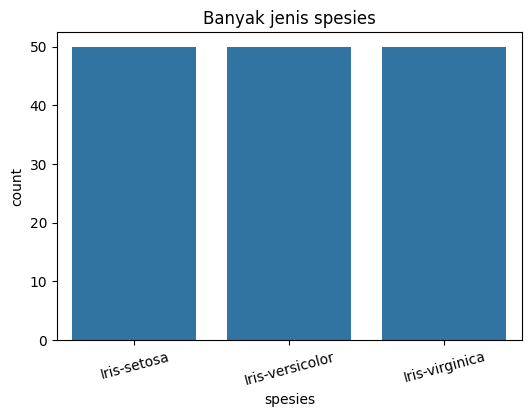

In [39]:

plt.figure(figsize=(6,4))
sns.countplot( x='spesies', data=df )
plt.title('Banyak jenis spesies')
plt.xticks(rotation=15)
plt.show()

In [40]:
# mapping label -> kode untuk target
spesies_cat = df['spesies'].astype('category')
spesies_classes = list(spesies_cat.cat.categories)  # urutan kelas
df['spesies'] = spesies_cat.cat.codes               # y numerik

# fitur kategorikal lain (lebal_sepal, lebar_petal) -> kode juga
for col in ['lebar_sepal','lebar_petal']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,id,panjang_sepal,lebar_sepal,panjang_petal,lebar_petal,spesies
0,1,5.1,14,1.4,1,0
1,2,4.9,9,1.4,1,0
2,3,4.7,11,1.3,1,0
3,4,4.6,10,1.5,1,0
4,5,5.0,15,1.4,1,0


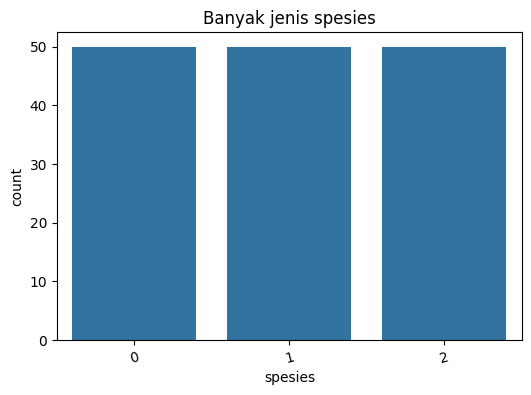

In [41]:
plt.figure(figsize=(6,4))
sns.countplot( x='spesies', data=df )
plt.title('Banyak jenis spesies')
plt.xticks(rotation=15)
plt.show()

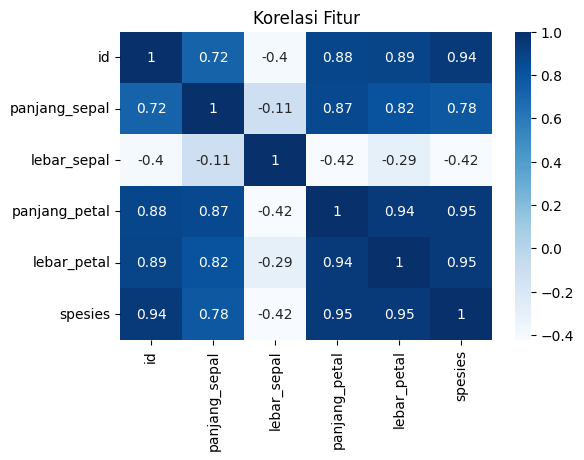

In [42]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Korelasi Fitur')
plt.show()

In [45]:
# Memilih fitur dan target
feature_cols = ['panjang_sepal', 'lebar_sepal', 'panjang_petal', 'lebar_petal']
X = df[feature_cols]
y = df['spesies']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )

len(X_train), len(X_test)

(120, 30)

In [46]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [47]:
# Evaluasi
y_pred = dt.predict(X_test)

# Redefine spesies_classes to ensure it's available
spesies_cat = df['spesies'].astype('category')
spesies_classes = list(spesies_cat.cat.categories)

print("Akurasi:", round(accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred
    ))

Akurasi: 1

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



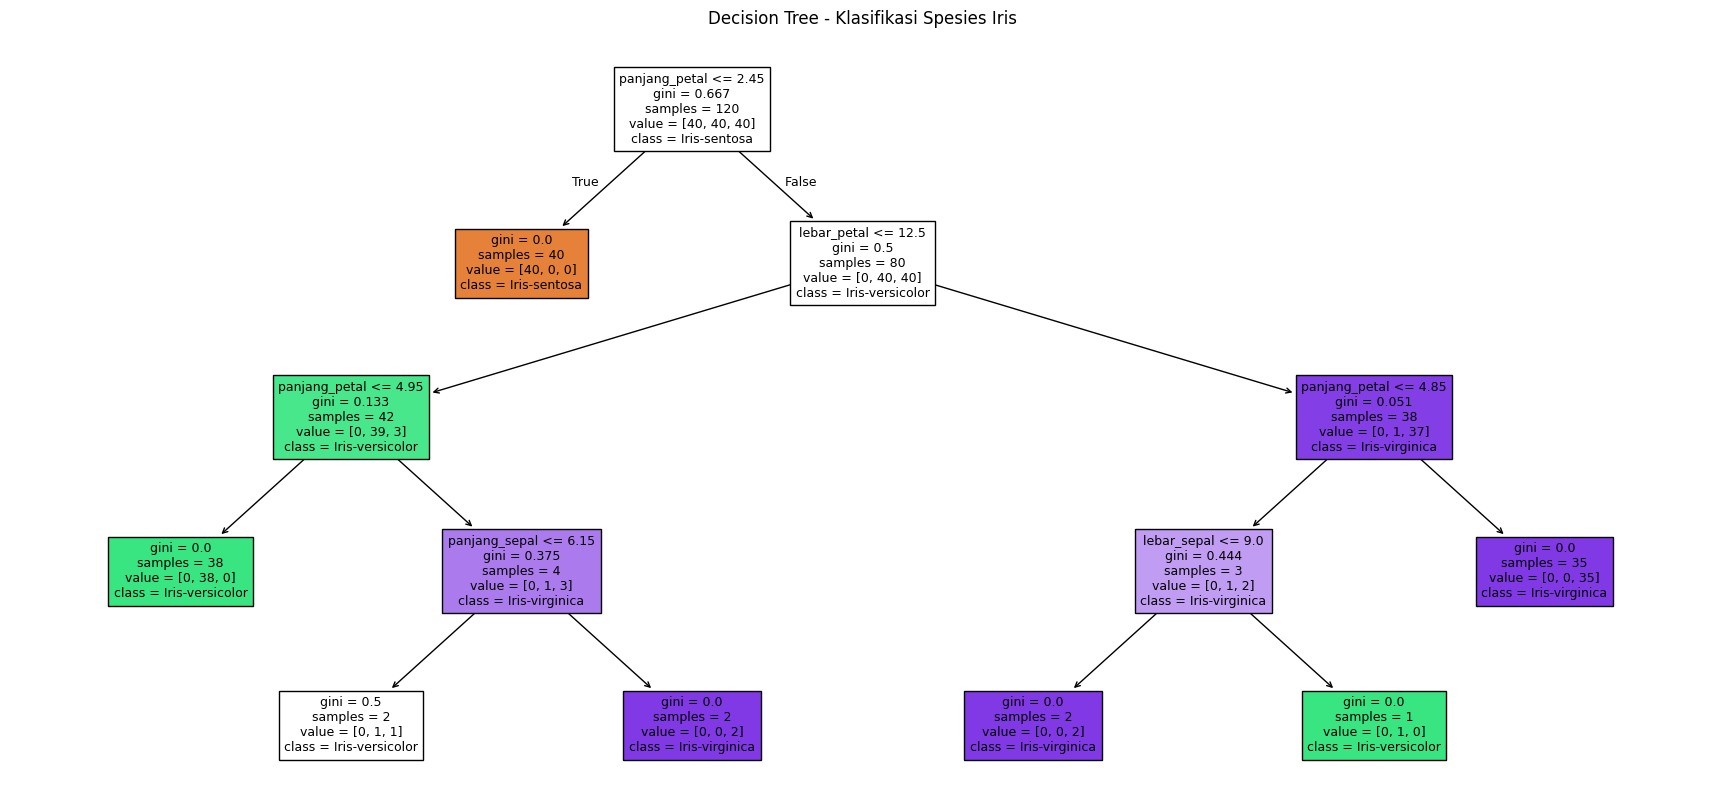

In [48]:
# Visualisasi model
plt.figure(figsize=(22,10))

# Provide the original string class names directly
spesies_classes_original = ['Iris-sentosa', 'Iris-versicolor', 'Iris-virginica']

plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=spesies_classes_original,  # use the original string class names
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Spesies Iris")
plt.show()

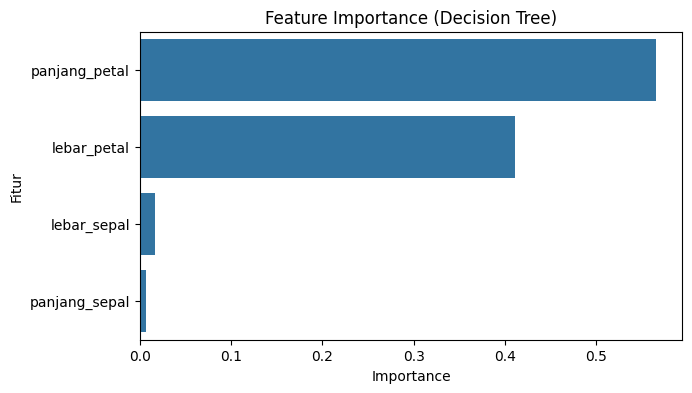

,0
panjang_petal,0.565639
lebar_petal,0.411154
lebar_sepal,0.016878
panjang_sepal,0.006329


In [49]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [50]:
scores = {}
for d in range(2, 9+1):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 3 | Acc: 96.67 %
